In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
# Set notebook mode to work in offline
# Load data from Google Sheets or CSV
url = "https://docs.google.com/spreadsheets/d/1GIbCJvwq3h6RyYvs8RlHGc87TSygv1Y03bapGVltlxw/export?format=csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

# Clean the data by filling NaN values
df.fillna(0, inplace=True)  # Replace NaN values with 0

# Convert the columns to appropriate data types if necessary
df['Year'] = df['Year'].astype(str)
df['Enrolling District Number'] = df['Enrolling District Number'].astype(int)
df['Enrolling District Type'] = df['Enrolling District Type'].astype(int)
df['Count of Open Enrolled'] = df['Count of Open Enrolled'].astype(int)
df['Resident District Number'] = df['Resident District Number'].astype(int)
df['Resident District Type'] = df['Resident District Type'].astype(int)





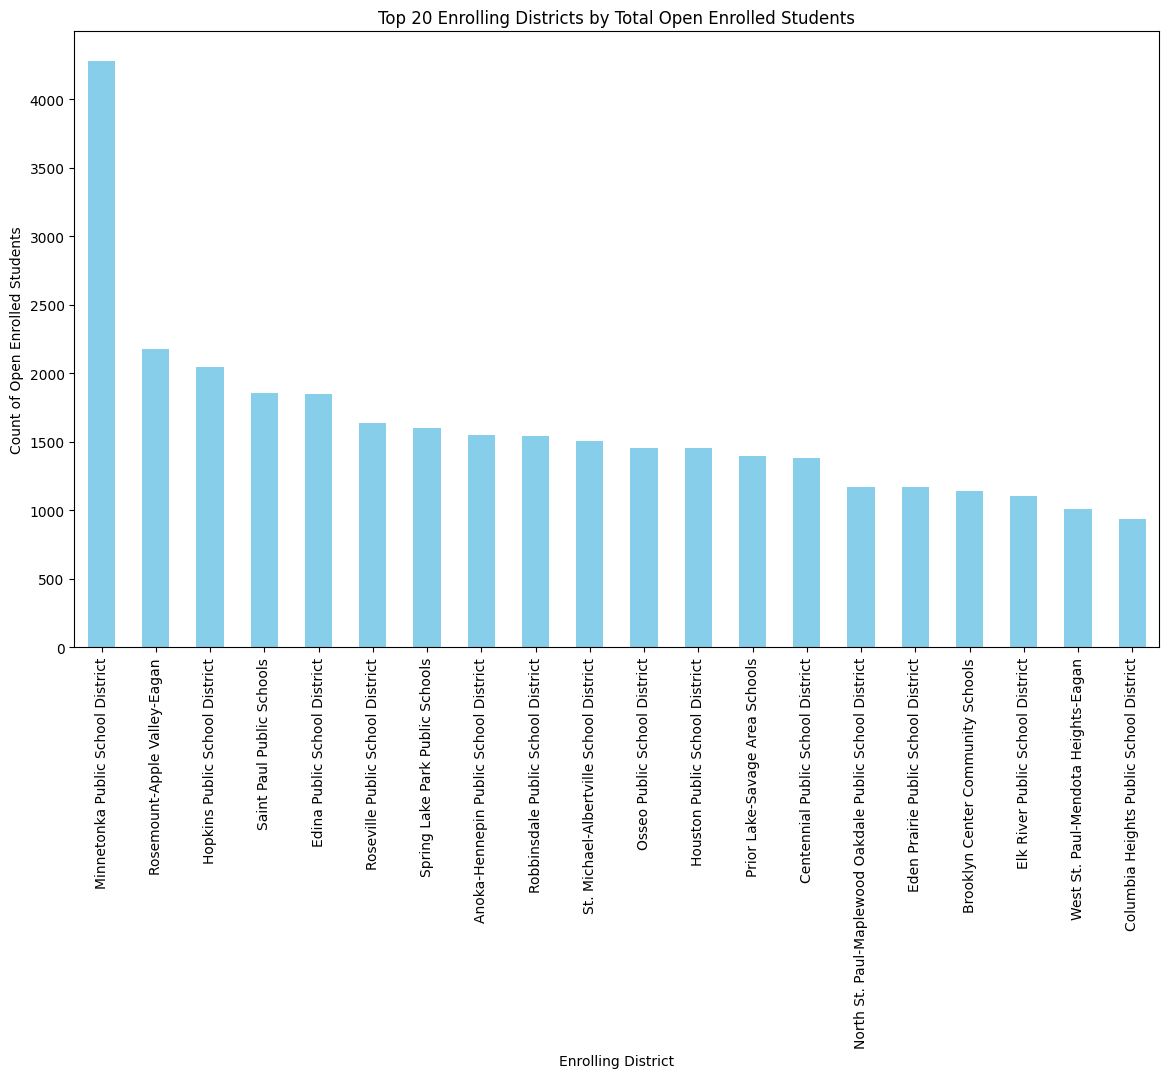

In [25]:
district_enrollment = df.groupby('Enrolling District')['Count of Open Enrolled'].sum()

# Sort by the count of open enrolled students in descending order and select the top 20
top_20_districts = district_enrollment.sort_values(ascending=False).head(20)

# Plot the data with a larger figure size and rotated labels
plt.figure(figsize=(14, 8))  # Increase figure size
top_20_districts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Enrolling Districts by Total Open Enrolled Students')
plt.ylabel('Count of Open Enrolled Students')
plt.xlabel('Enrolling District')
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels 90 degrees, centered alignment
plt.show()

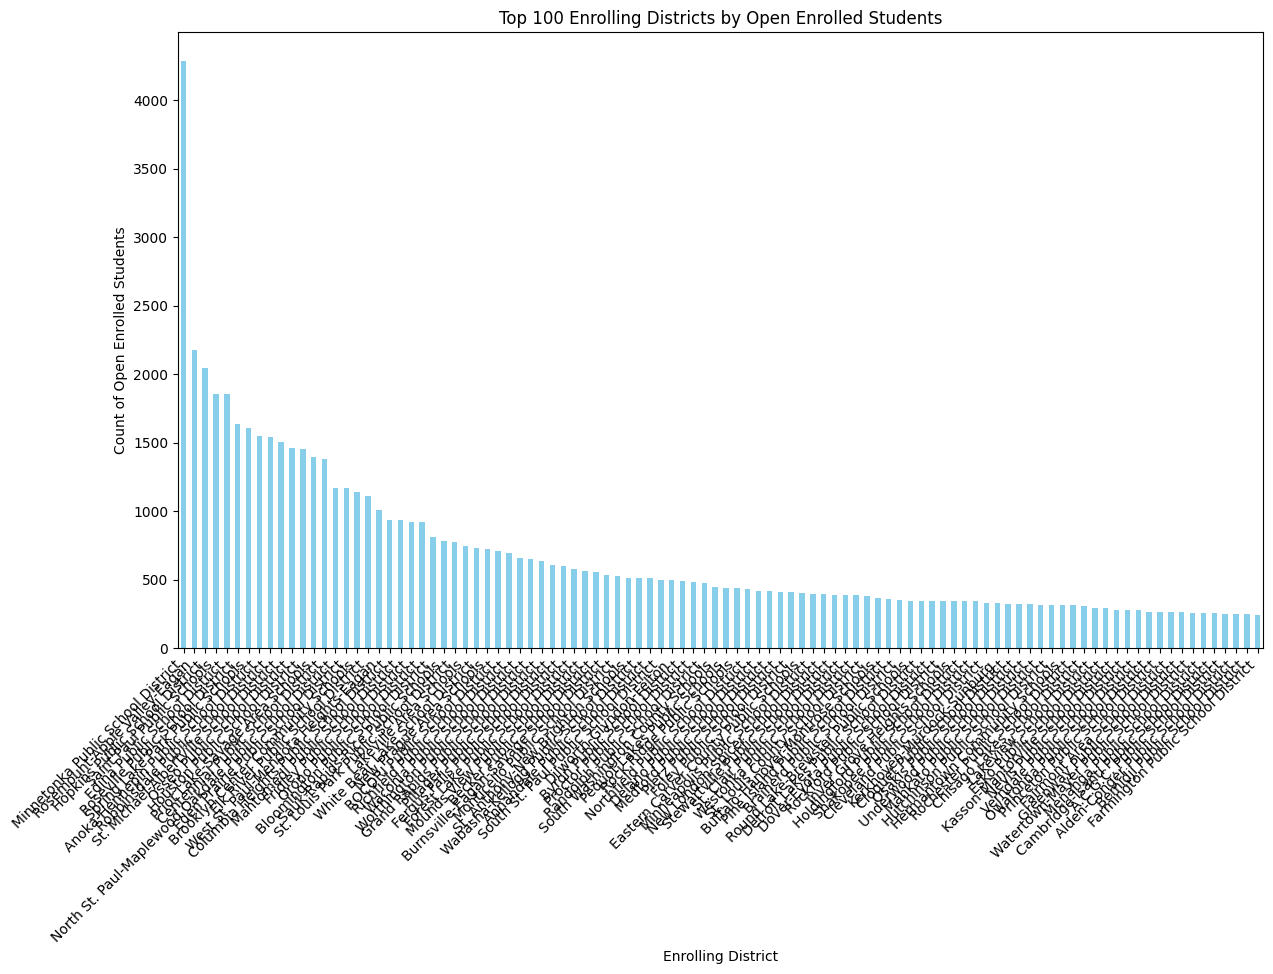

In [27]:
# Sort the districts by the number of open enrolled students and take the top N (e.g., top 20)
top_n = 100
top_district_enrollment = district_enrollment.sort_values(ascending=False).head(top_n)

# Plot the top N districts
plt.figure(figsize=(14, 8))
top_district_enrollment.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Enrolling Districts by Open Enrolled Students')
plt.ylabel('Count of Open Enrolled Students')
plt.xlabel('Enrolling District')
plt.xticks(rotation=45, ha='right')
plt.show()


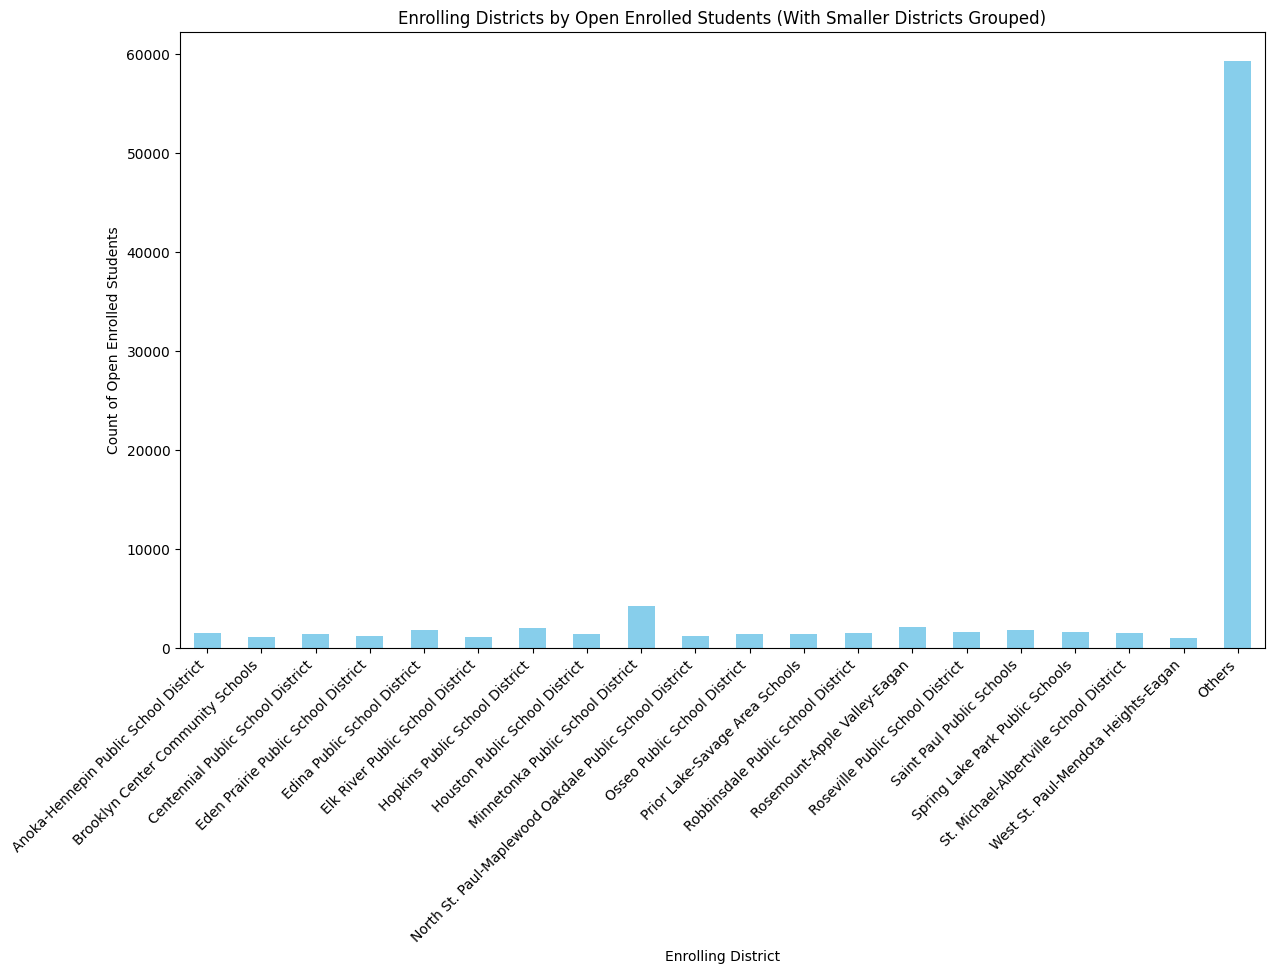

In [24]:
# Set a threshold, and any district with fewer than this threshold of students is grouped into "Others"
threshold = 1000
aggregated_district_enrollment = district_enrollment.copy()
aggregated_district_enrollment[aggregated_district_enrollment < threshold] = 0
aggregated_district_enrollment['Others'] = district_enrollment[district_enrollment < threshold].sum()

# Plot the aggregated data
plt.figure(figsize=(14, 8))
aggregated_district_enrollment[aggregated_district_enrollment > 0].plot(kind='bar', color='skyblue')
plt.title('Enrolling Districts by Open Enrolled Students (With Smaller Districts Grouped)')
plt.ylabel('Count of Open Enrolled Students')
plt.xlabel('Enrolling District')
plt.xticks(rotation=45, ha='right')
plt.show()


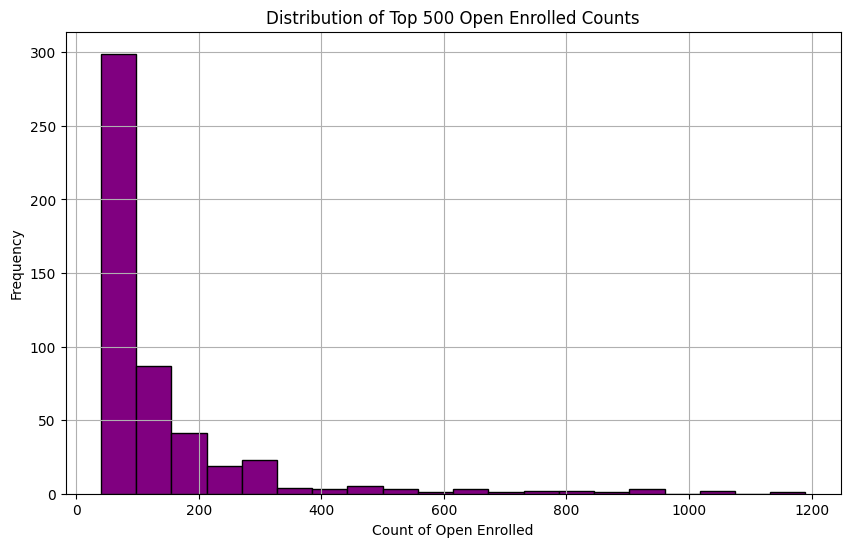

In [28]:
top_500_values = df['Count of Open Enrolled'].nlargest(500)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(top_500_values, bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Top 500 Open Enrolled Counts')
plt.xlabel('Count of Open Enrolled')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

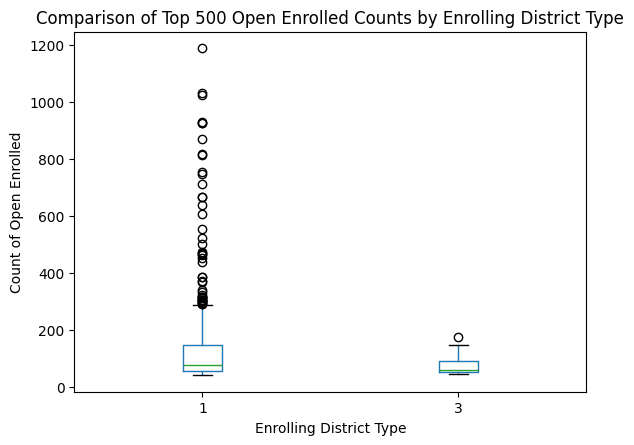

In [29]:
top_500_df = df.nlargest(500, 'Count of Open Enrolled')

# Plot the boxplot
plt.figure(figsize=(10, 6))
top_500_df.boxplot(column='Count of Open Enrolled', by='Enrolling District Type', grid=False)
plt.title('Comparison of Top 500 Open Enrolled Counts by Enrolling District Type')
plt.suptitle('')
plt.xlabel('Enrolling District Type')
plt.ylabel('Count of Open Enrolled')
plt.show()

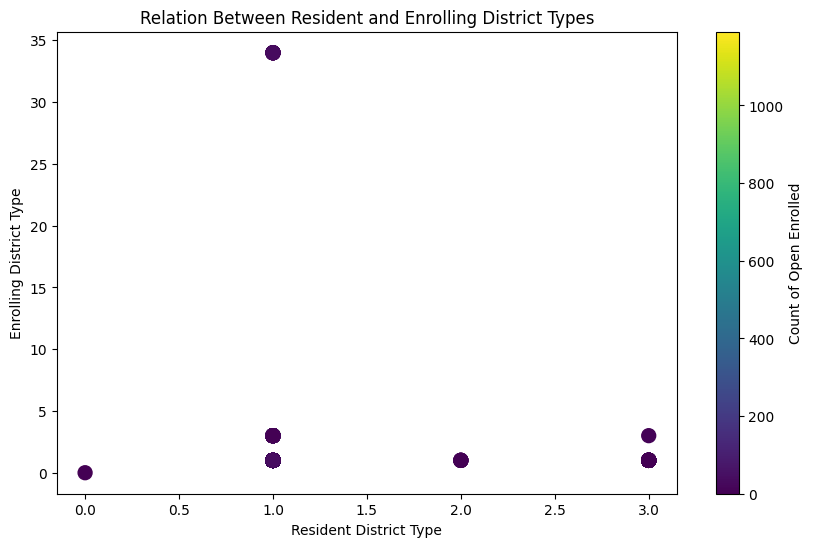

In [18]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Resident District Type'], df['Enrolling District Type'], c=df['Count of Open Enrolled'], cmap='viridis', s=100)
plt.title('Relation Between Resident and Enrolling District Types')
plt.xlabel('Resident District Type')
plt.ylabel('Enrolling District Type')
plt.colorbar(label='Count of Open Enrolled')
plt.show()
